In [1]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv

from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
load_dotenv()

True

In [3]:
llm = HuggingFaceEndpoint(
                            repo_id="mistralai/Mistral-7B-Instruct-v0.2",
                            task="text-generation"
                        )

model = ChatHuggingFace(llm = llm)

e:\04_LangGraph\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# --- 1. Define State ---
class MyState(TypedDict):
    input_text: str
    summary: str
    keywords: list

In [5]:
# --- 2. Define Nodes ---
def summarize(state: MyState) -> MyState:
    input_text = state['input_text']
    prompt = f"Summarize this: {input_text}"
    summary = model.invoke(prompt).content
    state["summary"] = summary
    return state

In [6]:
def extract_keywords(state: MyState) -> MyState:
    summary = state['summary']
    prompt = f"Extract 5 important keywords: {summary}"
    keywords = model.invoke(prompt).content
    state["keywords"] = keywords
    return state

In [7]:
# --- 3. Build Graph ---
builder = StateGraph(MyState)
builder.add_node("summarize", summarize)
builder.add_node("extract_keywords", extract_keywords)

builder.add_edge(START, "summarize")
builder.add_edge("summarize", "extract_keywords")
builder.add_edge("extract_keywords", END)

workflow = builder.compile()


In [8]:
# --- 4. Run ---
input_data = {
    "input_text": "Machine Learning is a part of Artificial Intelligence that allows computers to learn from data and make decisions without being directly programmed. Just like humans learn from experience, machines learn by analyzing large amounts of data and identifying patterns. Over time, they get better at making predictions or taking actions based on what they’ve learned. Machine learning is used in many real-world applications like movie recommendations on Netflix, fraud detection in banks, self-driving cars, and voice assistants. It helps in automating tasks and improving efficiency in various industries. In short, it's about making machines smarter using data."
}

output = workflow.invoke(input_data)

In [9]:
print(output['summary'])

 Machine Learning is a subfield of Artificial Intelligence where systems are able to learn and make decisions with minimal human intervention. They learn by analyzing large data sets, identifying patterns, and making predictions or taking actions based on the learned patterns. Applications of Machine Learning include movie recommendations, fraud detection, self-driving cars, and voice assistants. Its primary objective is to make machines intelligent by enabling them to learn from data, ultimately leading to automation and efficiency improvements.


In [10]:
print(output['keywords'])

 1. Machine Learning
2. Artificial Intelligence
3. Minimal human intervention
4. Data sets
5. Automation and efficiency improvements.

Additionally, key processes mentioned are: analyzing large data sets, identifying patterns, making predictions or taking actions, and enabling machines to learn from data. Other applications mentioned are movie recommendations, fraud detection, self-driving cars, and voice assistants.


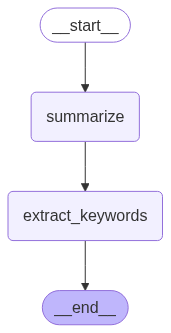

In [11]:
# Draw the Graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())